In [ ]:
import base64
import tempfile

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
plt.switch_backend('cairo')
import pandas as pd
import seaborn as sns
import yaml

import graph_tool as gt
import graph_tool.draw

from IPython.display import Image, SVG, HTML

plt.style.use('fivethirtyeight')

In [209]:
motifs = None

def save_motifs(motifs):
    for k in motifs:
        for i, motif in enumerate(motifs[k]):
            pos = gt.draw.arf_layout(motif)
            gt.draw.graph_draw(motif, pos=pos, 
                               vertex_size=10,
                               inline=False,
                               output_size=(100,100),
                               output="../outputs/stats/motifs/{}.{}.png".format(k, i))
            
def render_stats(data):
    html = ["<table width=100%>"]
    for k in data['motifs']:
        for pos, count in enumerate(data['motifs'][k][1]):
            html.append("<tr>")
            with open("../outputs/stats/motifs/{0}.{1}.png".format(k, pos), 'rb') as f:
                html.append("""<td width=100px><img src="data:image/png;base64,{0}"></td>""".format(
                        base64.b64encode(f.read()).decode("ascii")))
            html.append("<td>{0}</td>".format(count))
            html.append("</tr>")
    html.append("</table>")
    return ''.join(html)

In [214]:
with open('../outputs/stats/31/invertebrate/GCF_000002195.4_Amel_4.5_cds_from_genomic.stats', 'r') as f:
    data = yaml.load(f)

    if motifs is None:
        motifs = {
            3: [None] * 2, 
            4: [None] * 5
        }
        for msize in data['motifs']:
            for i, motif in enumerate(data['motifs'][msize][0]):
                with tempfile.TemporaryFile() as f:
                    f.write(motif.encode('utf-8'))
                    f.seek(0)
                    mg = gt.load_graph(f, fmt='dot')
                    motifs[msize][i] = mg
        save_motifs(motifs)

## Linear paths

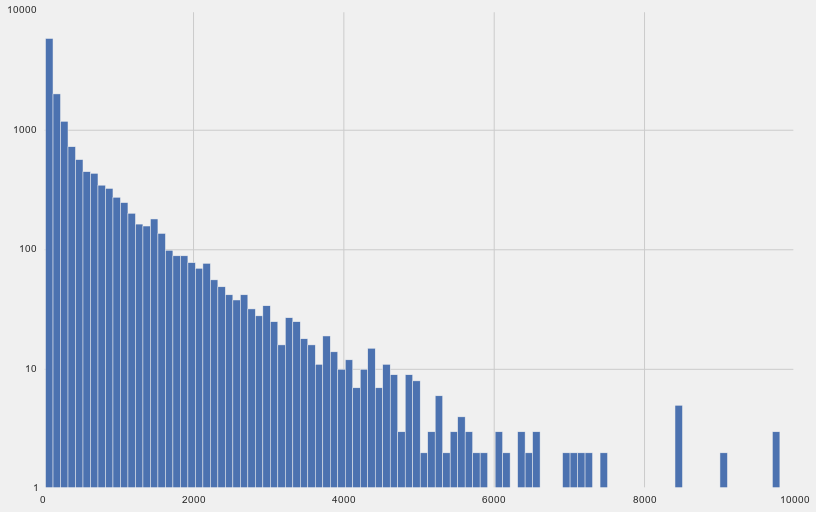

In [215]:
fig = plt.figure(figsize=(12,8))
width = data['linear_paths']['bins'][1] - data['linear_paths']['bins'][0]
plt.bar(data['linear_paths']['bins'][:-1], data['linear_paths']['counts'],
        log=True, width=width)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))

In [216]:
sum(data['linear_paths']['counts'])

14452

## Motifs (3 and 4 nodes)

,64011
,47
,18952
,65094
,185
,3719
,18

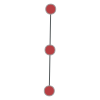
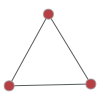
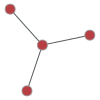
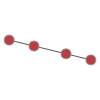
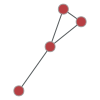
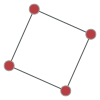
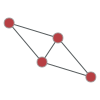

In [217]:
HTML(render_stats(data))